In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('/content/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
X = df.iloc[:, 3:-1]   # All columns from index 3 to second last
y = df.iloc[:, -1]    # Last column (Exited)
X.shape, y.shape

((10000, 10), (10000,))

In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [7]:
# Label Encoding for Gender
label_encoder_gender = LabelEncoder()
X['Gender'] = label_encoder_gender.fit_transform(X['Gender'])

# One-Hot Encoding for Geography
ct = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(drop='first'), ['Geography'])
    ],
    remainder='passthrough'
)

X = ct.fit_transform(X)

In [8]:
#  Feature Scaling

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Initialize ANN
ann = Sequential()

# Input + Hidden Layer 1
ann.add(Dense(units=6, activation='relu'))

# Hidden Layer 2
ann.add(Dense(units=6, activation='relu'))

# Output Layer
ann.add(Dense(units=1, activation='sigmoid'))

In [10]:

ann.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [11]:
history = ann.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=100,
    validation_split=0.2
)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7529 - loss: 0.5260 - val_accuracy: 0.7987 - val_loss: 0.4737
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7954 - loss: 0.4729 - val_accuracy: 0.7987 - val_loss: 0.4535
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8000 - loss: 0.4533 - val_accuracy: 0.7987 - val_loss: 0.4438
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7952 - loss: 0.4509 - val_accuracy: 0.7987 - val_loss: 0.4385
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7982 - loss: 0.4397 - val_accuracy: 0.7987 - val_loss: 0.4358
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7919 - loss: 0.4421 - val_accuracy: 0.7987 - val_loss: 0.4336
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7892 - loss: 0.4365 - val_accuracy: 0.7987 - val_loss: 0.4312
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7888 - loss: 0.4441 - val_accu

In [12]:
test_loss, test_accuracy = ann.evaluate(X_test, y_test)

print(f"Test Accuracy: {test_accuracy:.4f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8565 - loss: 0.3337
Test Accuracy: 0.8585


In [13]:

y_pred_prob = ann.predict(X_test)


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


In [14]:
# Convert probabilities to binary output
y_pred = (y_pred_prob > 0.5).astype(int)


In [16]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[1540   67]
 [ 216  177]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.73      0.45      0.56       393

    accuracy                           0.86      2000
   macro avg       0.80      0.70      0.74      2000
weighted avg       0.85      0.86      0.85      2000



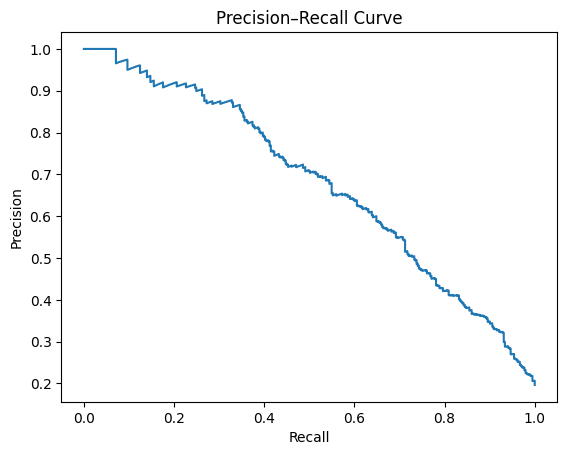

In [17]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)

plt.figure()
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve")
plt.show()


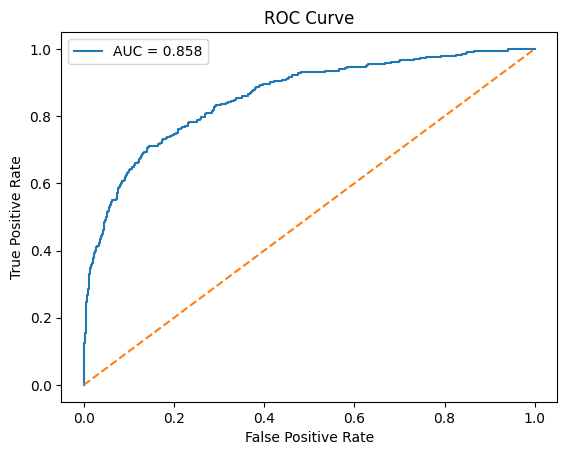

In [18]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
